# DOWNLOADING THE IMDB DATA AS RAW TEXT

In [1]:
import os

imdb_path = 'aclImdb'
train_dir = os.path.join(imdb_path, 'train')

labels = []
texts = []

fail = 0
for label_type in ['neg', 'pos']:
    dir_name = os.path.join(train_dir, label_type)
    for fname in os.listdir(dir_name):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname))
            try:
                texts.append(f.read())
                
                if label_type == 'neg':
                    labels.append(0)
                else:
                    labels.append(1)
                f.close()
            except:
                fail += 1
            f.close()

print("Failed: " + str(fail))
print("Total: " + str(len(os.listdir(dir_name))))

Failed: 2347
Total: 12500


In [2]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

import numpy as np

maxlen = 100
training_samples = 200
validation_samples = 10000
max_words = 10000

tokenizer = Tokenizer(num_words = max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

data = pad_sequences(sequences, maxlen = maxlen)

labels = np.asarray(labels)
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)

Using TensorFlow backend.


Found 79622 unique tokens.
Shape of data tensor: (22653, 100)
Shape of label tensor: (22653,)


In [4]:
indicies = np.arange(data.shape[0])
np.random.shuffle(indicies)
data = data[indicies]
labels = labels[indicies]

x_train = data[:training_samples]
y_train = labels[:training_samples]

x_val = data[training_samples: training_samples + validation_samples]
y_val = labels[training_samples: training_samples + validation_samples]

In [5]:
glove_dir = 'glove.6B'
embeddings_index = {}
f = open(os.path.join(glove_dir, 'glove.6B.100d.txt'))
fail = 0

try:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs
except:
    fail += 1
f.close()
print('Found %s word vectors.' % len(embeddings_index))
print(fail)

Found 210 word vectors.
1


In [6]:
embedding_dim = 100
embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    if i < max_words:
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

In [7]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense
model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
flatten_1 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                320032    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

In [9]:
model.compile(optimizer='rmsprop', 
              loss='binary_crossentropy', 
              metrics=['acc'])

history = model.fit(x_train, 
                    y_train, 
                    epochs=10, 
                    batch_size=32, 
                    validation_data=(x_val, y_val))

model.save_weights('pre_trained_glove_model.h5')

Train on 200 samples, validate on 10000 samples
Epoch 1/10
200/200 [==============================] - 1s 3ms/step - loss: 1.9471 - acc: 0.5050 - val_loss: 1.9351 - val_acc: 0.5004
Epoch 2/10
200/200 [==============================] - 0s 1ms/step - loss: 0.7199 - acc: 0.6650 - val_loss: 1.2011 - val_acc: 0.4994
Epoch 3/10
200/200 [==============================] - 0s 1ms/step - loss: 0.6022 - acc: 0.6800 - val_loss: 0.7711 - val_acc: 0.5116
Epoch 4/10
200/200 [==============================] - 0s 1ms/step - loss: 0.4006 - acc: 0.8000 - val_loss: 0.7642 - val_acc: 0.5198
Epoch 5/10
200/200 [==============================] - 0s 1ms/step - loss: 0.2252 - acc: 0.9600 - val_loss: 0.9245 - val_acc: 0.5129
Epoch 6/10
200/200 [==============================] - 0s 1ms/step - loss: 0.2020 - acc: 0.9300 - val_loss: 1.0767 - val_acc: 0.5096
Epoch 7/10
200/200 [==============================] - 0s 1ms/step - loss: 0.1602 - acc: 0.9750 - val_loss: 1.1685 - val_acc: 0.5036
Epoch 8/10
200/200 [========

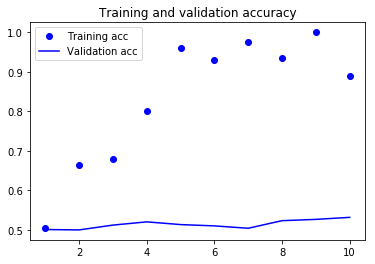

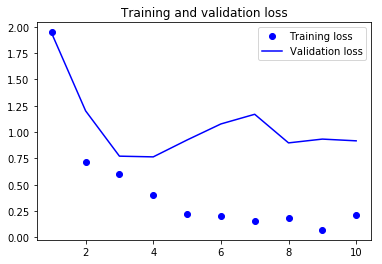

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [11]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense
model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
flatten_2 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 32)                320032    
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 33        
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.compile(optimizer='rmsprop', 
              loss='binary_crossentropy', 
              metrics=['acc'])

history = model.fit(x_train, 
                    y_train, 
                    epochs=10, 
                    batch_size=32, 
                    validation_data=(x_val, y_val))

Train on 200 samples, validate on 10000 samples
Epoch 1/10
200/200 [==============================] - 1s 3ms/step - loss: 0.6828 - acc: 0.5600 - val_loss: 0.7047 - val_acc: 0.5105
Epoch 2/10
200/200 [==============================] - 0s 1ms/step - loss: 0.4619 - acc: 0.9700 - val_loss: 0.7384 - val_acc: 0.5043
Epoch 3/10
200/200 [==============================] - 0s 1ms/step - loss: 0.2415 - acc: 0.9900 - val_loss: 0.7603 - val_acc: 0.5116
Epoch 4/10
200/200 [==============================] - 0s 2ms/step - loss: 0.1009 - acc: 1.0000 - val_loss: 0.7700 - val_acc: 0.5161
Epoch 5/10
200/200 [==============================] - 0s 1ms/step - loss: 0.0465 - acc: 1.0000 - val_loss: 0.7749 - val_acc: 0.5198
Epoch 6/10
200/200 [==============================] - 0s 1ms/step - loss: 0.0240 - acc: 1.0000 - val_loss: 0.7629 - val_acc: 0.5191
Epoch 7/10
200/200 [==============================] - 0s 1ms/step - loss: 0.0132 - acc: 1.0000 - val_loss: 0.8029 - val_acc: 0.5192
Epoch 8/10
200/200 [========

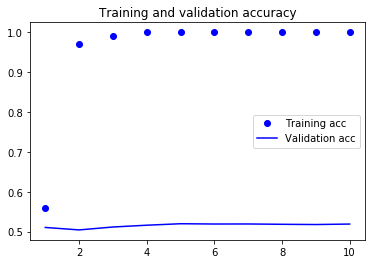

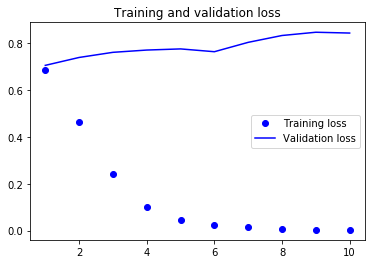

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()